
### This prject aims to find collocations in *The Little Prince* corpus. It can find both the overall top collocations, and the collocations of specific keywords.


In [1]:
"""
To-Do: 

1. Check how does the function calculate the collocation score between 2 word, you may search this line:
score_list = finder.score_ngrams(bigram_measures.student_t)
the variable student_t represents we use student_t to calculate, but there are other measure such as raw_freq, .pmi, .likelihood_ratio, .chi_sq, .phi_sq, .fisher, .student_t, .mi_like, .poisson_stirling, .jaccard, .dice
recall statistic and change it into the most appropiate one

2. Add keyword in words_of_interest

3. The function get_collocations(tokens, windowsize=10, numresults=10) is for finding the top collocations in a corpus, which we did not use in this script

4. Adjust the output figure properties in the last 2 block, such as node size/ color...


"""

'\nTo-Do: \n\n1. Check how does the function calculate the collocation score between 2 word, you may search this line:\nscore_list = finder.score_ngrams(bigram_measures.student_t)\nthe variable student_t represents we use student_t to calculate, but there are other measure such as raw_freq, .pmi, .likelihood_ratio, .chi_sq, .phi_sq, .fisher, .student_t, .mi_like, .poisson_stirling, .jaccard, .dice\nrecall statistic and change it into the most appropiate one\n\n2. Add keyword in words_of_interest\n\n3. The function get_collocations(tokens, windowsize=10, numresults=10) is for finding the top collocations in a corpus, which we did not use in this script\n\n4. Adjust the output figure properties in the last 2 block, such as node size/ color...\n\n\n'

In [2]:
#!/usr/bin/env python3
import string
from nltk.tokenize import word_tokenize
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import BigramAssocMeasures
from nltk.corpus import stopwords
import nltk


In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# Use Natural Language Toolkit to find the top collocations in a corpus, "token" for tokenize data
def get_collocations(tokens, windowsize=10, numresults=10):

    # initialize the bigram association measures object to score each collocation
    bigram_measures = BigramAssocMeasures()

    # initialize the bigram collocation finder object to find and rank collocations
    finder = BigramCollocationFinder.from_words(tokens, window_size=windowsize)

    # apply a series of filters to narrow down the collocation results
    finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in ignored_words)
    finder.apply_freq_filter(1)

    # calculate the top results by T-score
    # list of all possible measures: .raw_freq, .pmi, .likelihood_ratio, .chi_sq, .phi_sq, .fisher, .student_t, .mi_like, .poisson_stirling, .jaccard, .dice
    results = finder.nbest(bigram_measures.student_t, numresults)
    
    print("Top ", str(numresults), " collocations:")
    for k, v in results:
        print(str(k), ", ", str(v))

In [5]:
# Find collocations for a specific keyword in a corpus
def get_keyword_collocations(tokens, keyword, windowsize=10, numresults=10):

    # initialize the bigram association measures object to score each collocation
    bigram_measures = BigramAssocMeasures()

    # initialize the bigram collocation finder object to find and rank collocations
    finder = BigramCollocationFinder.from_words(tokens, window_size=windowsize)

    # initialize a function that will narrow down collocates that don't contain the keyword
    keyword_filter = lambda *w: keyword not in w

    # apply a series of filters to narrow down the collocation results
    finder.apply_word_filter(lambda w: len(w) < 2 or w.lower() in ignored_words)
    finder.apply_freq_filter(1)
    finder.apply_ngram_filter(keyword_filter)

    # calculate the top results by T-score
    # list of all possible measures: .raw_freq, .pmi, .likelihood_ratio, .chi_sq, .phi_sq, .fisher, .student_t, .mi_like, .poisson_stirling, .jaccard, .dice
    results_pair = []
    results_score = []
    results = []
    freq = []
    score_list = finder.score_ngrams(bigram_measures.student_t)

    for pair, score in score_list[:numresults]:
        results_pair.append(pair)
        results_score.append(score)

    #for k,v in finder.ngram_fd.items():
      #print(k,v)
    #results = finder.nbest(bigram_measures.student_t, numresults)

    print("Top collocations for ", str(keyword), ":")
    collocations = ''
    for k, v in results_pair:
        if k != keyword:
            collocations += k + ' '
            results.append(k)
        else:
            collocations += v + ' '
            results.append(v)
        freq.append(finder.ngram_fd[(k,v)])
    print(collocations, '\n')

    # Here we return result: the collocation_word list and score: Student_T score
    return results,results_score,freq

In [6]:
#file = r"C:\Users\user\Desktop\Brainhack\the_little_prince_en.txt"

!gdown --id '1Lfj1FlnbMtrI7BbiYpy1lNhialkCTvjz' --output file.txt

# Read in the corpus and stored as a string
with open("file.txt", encoding="utf-8") as f:  
    corpus = f.read()

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Lfj1FlnbMtrI7BbiYpy1lNhialkCTvjz
To: /content/file.txt
100% 95.9k/95.9k [00:00<00:00, 133MB/s]


In [7]:
# Clean the data : remove punctuation, remove non-ascii characters
translator = str.maketrans('', '', string.punctuation)
data = corpus.translate(translator)  
data = "".join(i for i in data if ord(i) < 128)

# Convert the corpus (a string) into  a list of words
tokens = word_tokenize(data)

In [8]:
#ignored_words = stopwords.words('english')
ignored_words = ["the", "his", "this", "your", "all", "of", "as","himself", "herself", "but", "my", "they", "was"]

In [9]:
# Get the top collocations for the entire corpus
get_collocations(tokens=tokens)

Top  10  collocations:
little ,  prince
did ,  not
said ,  prince
said ,  little
Good ,  morning
you ,  will
have ,  been
Good ,  said
morning ,  said
said ,  fox


In [10]:
import networkx as nx
import matplotlib.pyplot as plt

def draw(edges, ax):

    graph = nx.Graph()
    graph.add_weighted_edges_from(edges)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=2000, ax=ax)
    nx.draw_networkx_edges(graph, pos, width=1.0, alpha=0.5, ax=ax)
    nx.draw_networkx_labels(graph, pos, font_size=10, font_color='black', ax=ax)



Top collocations for  up :
at rose over had knees with extinct sky everything volcanoes three without took There anything he look He see been  

Top collocations for  down :
sat He beside prince sit in from he him tired And after eyes silence Oh once would myself because where  

Top collocations for  in front of :
 

Top collocations for  behind :
her have that affection inconsistent stratagems guessed sheltered poor Flowers screen lay ought globe because because she so for are  

Top collocations for  in :
desert world unique found put arms danger which there years love engine until question single alike salute succeeded hurry wrong  

Top collocations for  in :
desert world unique found put arms danger which there years love engine until question single alike salute succeeded hurry wrong  

Top collocations for  in :
desert world unique found put arms danger which there years love engine until question single alike salute succeeded hurry wrong  

Top collocations for  outside :
from

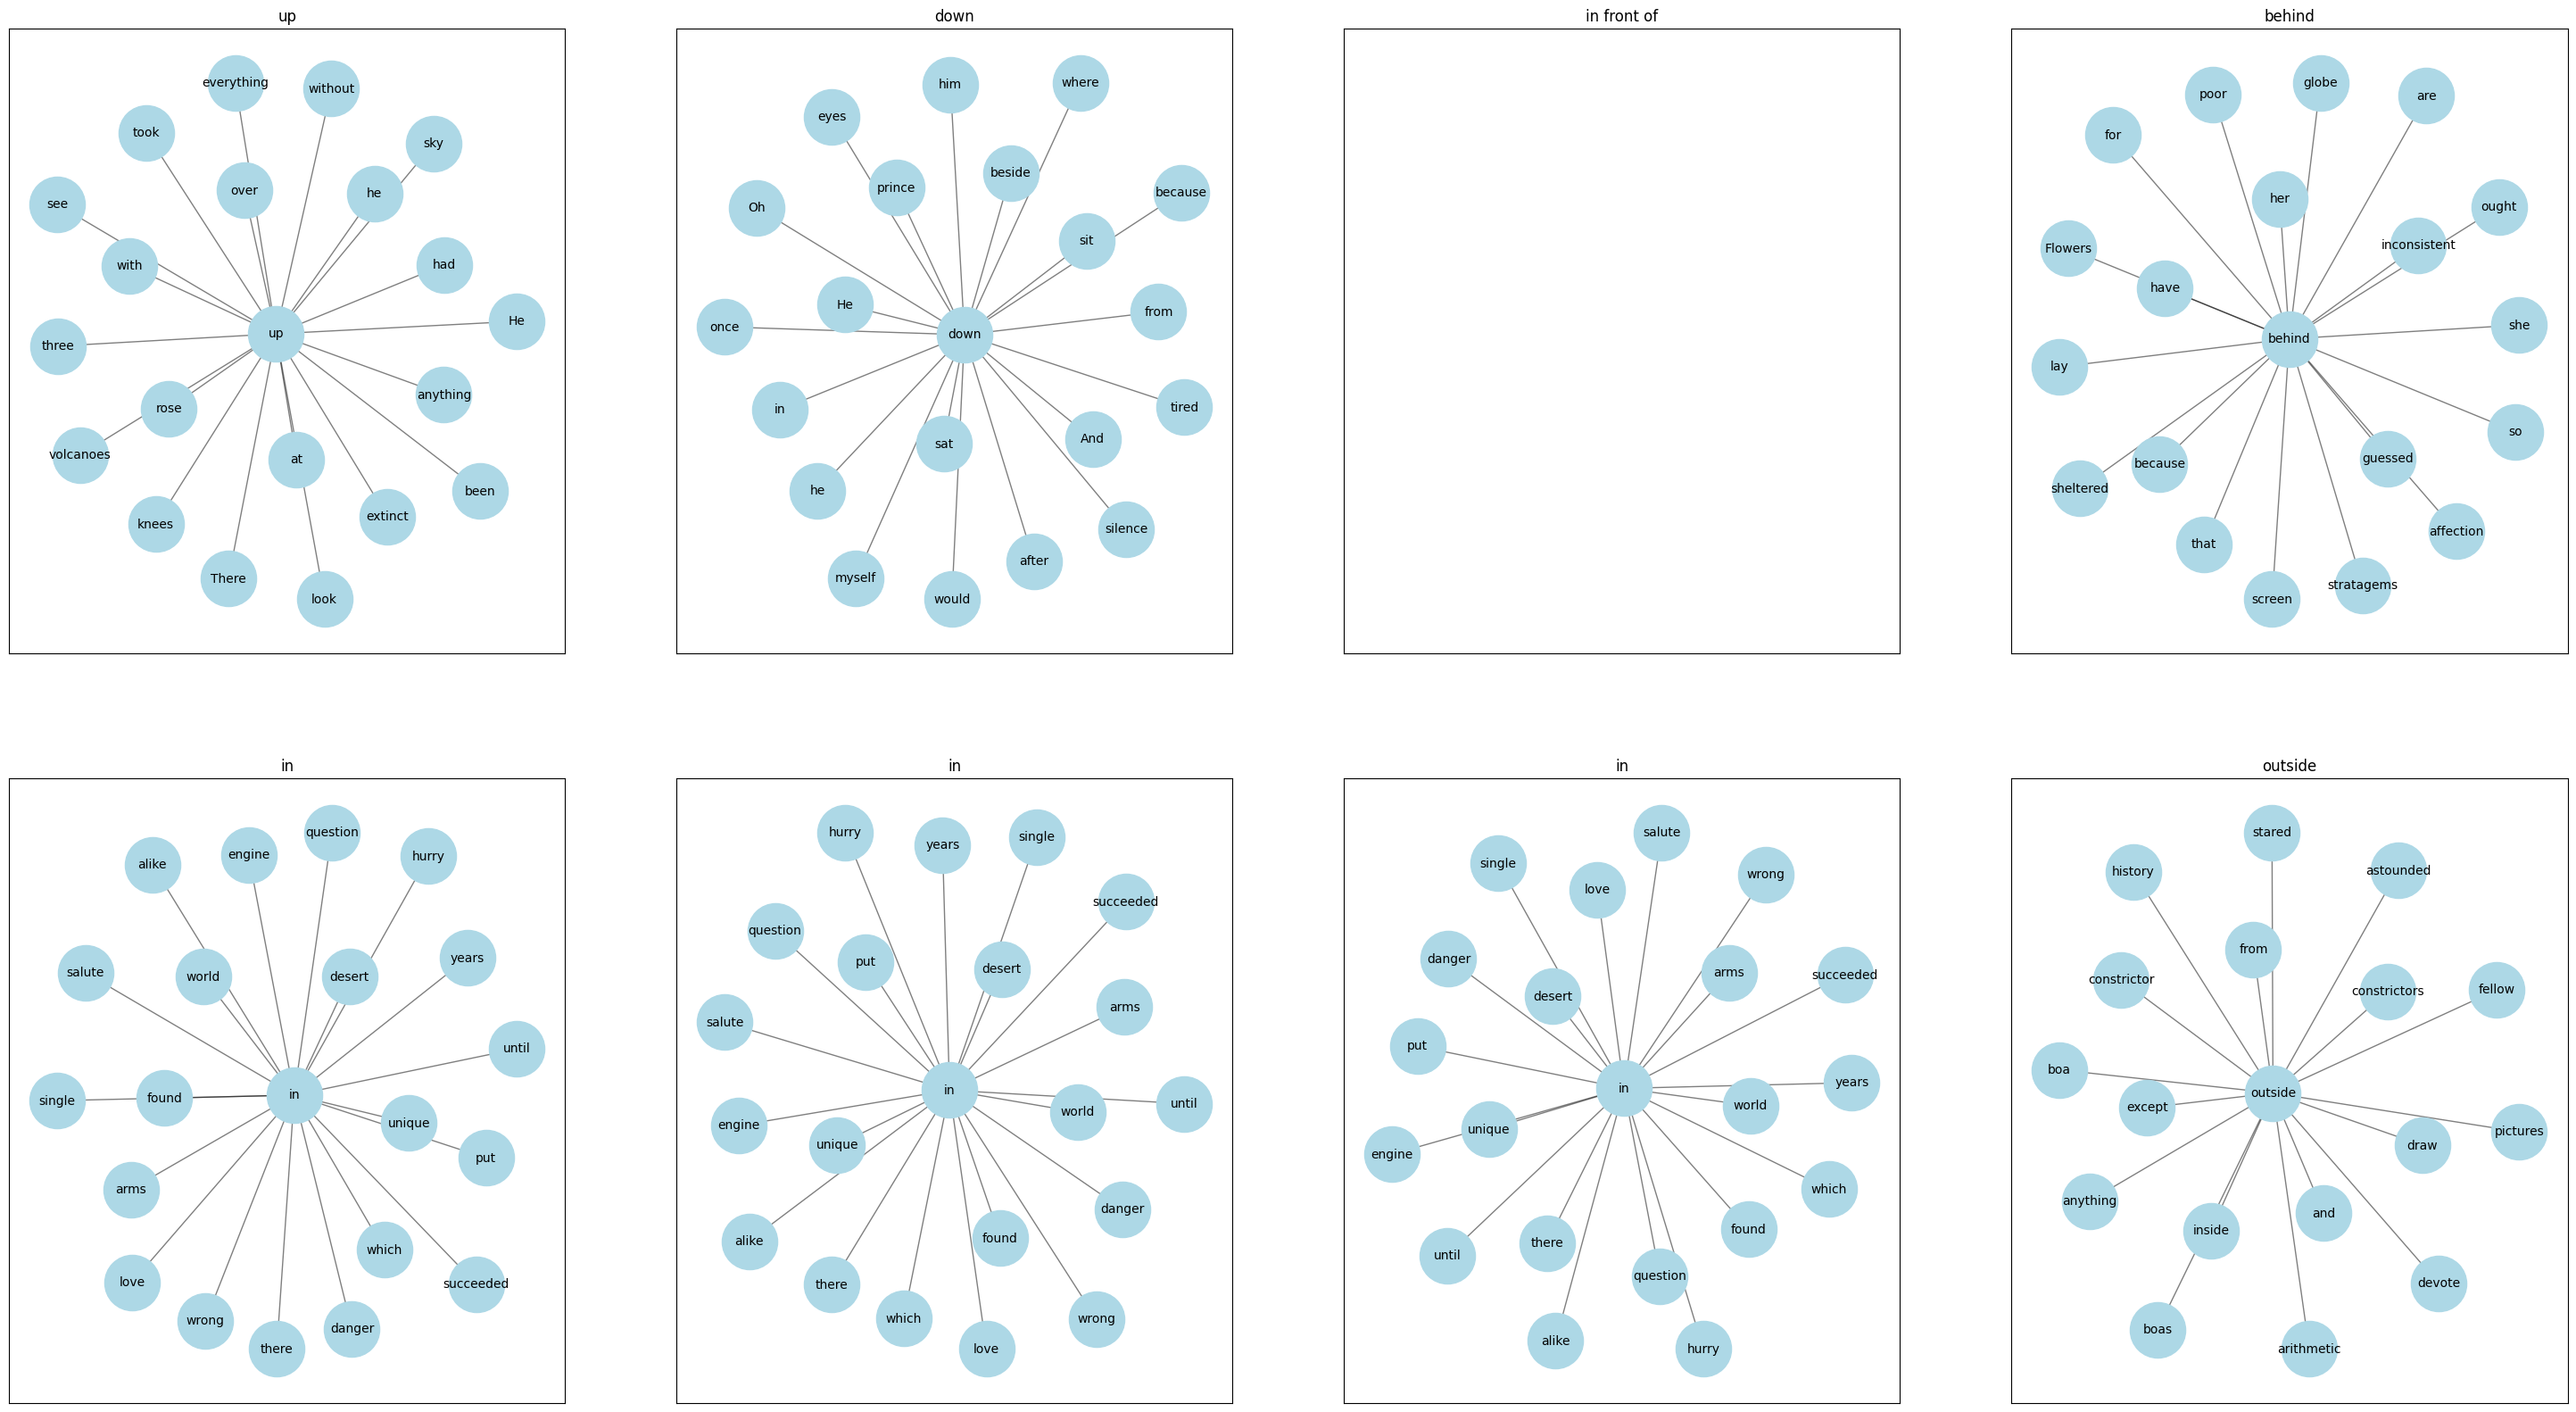

<Figure size 3000x3000 with 0 Axes>

In [18]:
import pandas as pd 
from IPython.display import display, HTML

#%matplotlib
#plt.ion
plt.rcParams.update({'figure.max_open_warning': 0})

edges_list = []
words_of_interest = ['up','down','in front of','behind','in', 'in','in','outside']

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(37, 20))
fig.set_facecolor('white')

plt.figure(figsize=(30, 30))

number = 20

# Draw network figure
for ind, dir_word in enumerate(words_of_interest):
    if ind < 4:
      start = 0
    else:
      start = 1
    # Get the top collocations for each keyword in the list above
    results, results_score, freq_list = get_keyword_collocations(tokens=tokens, keyword=dir_word, numresults=number)
    edges = []
    for i, word in enumerate(results):
        score = results_score[i]
        edges.append((dir_word, word, score))

    ax[start,ind%4].title.set_text(dir_word)
    draw(edges, ax[start,ind%4])

    # map lists into dict 
    df_dict = {'word': results, 'frequency': freq_list, 'score': results_score} 
        
    df = pd.DataFrame(df_dict)
    df.index += 1
    #display(HTML(df.to_html()))

    # plotting a bar graph
    #df.plot(x="word", y="frequency", kind="bar")

plt.show()
 


Top collocations for  up :
at rose over had knees with extinct sky everything volcanoes three without took There anything he look He see been  



,word,frequency,score
1,at,6,0.634534
16,he,6,0.391918
4,had,4,0.483274
6,with,4,0.453095
3,over,3,0.507656
18,He,3,0.381670
2,rose,3,0.539823
13,took,2,0.425443
19,see,2,0.369632
17,look,2,0.386047


Top collocations for  down :
sat He beside prince sit in from he him tired And after eyes silence Oh once would myself because where  



,word,frequency,score
1,sat,8,0.931319
4,prince,7,0.567802
8,he,7,0.488834
6,in,6,0.499958
2,He,6,0.678130
11,And,5,0.454667
7,from,4,0.497202
9,him,4,0.485595
5,sit,3,0.566628
3,beside,3,0.571989


Top collocations for  in front of :
 



,word,frequency,score


Top collocations for  behind :
her have that affection inconsistent stratagems guessed sheltered poor Flowers screen lay ought globe because because she so for are  



,word,frequency,score
1,her,2,0.464586
3,that,2,0.398926
2,have,2,0.436049
12,lay,1,0.332262
19,for,1,0.291905
18,so,1,0.310476
17,she,1,0.319405
16,because,1,0.324762
15,because,1,0.324762
14,globe,1,0.330833


Top collocations for  in :
desert world unique found put arms danger which there years love engine until question single alike salute succeeded hurry wrong  



,word,frequency,score
1,desert,10,0.912637
8,which,9,0.632202
9,there,9,0.602381
5,put,7,0.679031
2,world,7,0.746660
3,unique,6,0.743449
4,found,6,0.706926
10,years,5,0.585317
14,question,5,0.558644
11,love,5,0.585317


Top collocations for  in :
desert world unique found put arms danger which there years love engine until question single alike salute succeeded hurry wrong  



,word,frequency,score
1,desert,10,0.912637
8,which,9,0.632202
9,there,9,0.602381
5,put,7,0.679031
2,world,7,0.746660
3,unique,6,0.743449
4,found,6,0.706926
10,years,5,0.585317
14,question,5,0.558644
11,love,5,0.585317


Top collocations for  in :
desert world unique found put arms danger which there years love engine until question single alike salute succeeded hurry wrong  



,word,frequency,score
1,desert,10,0.912637
8,which,9,0.632202
9,there,9,0.602381
5,put,7,0.679031
2,world,7,0.746660
3,unique,6,0.743449
4,found,6,0.706926
10,years,5,0.585317
14,question,5,0.558644
11,love,5,0.585317


Top collocations for  outside :
from boa and except inside from constrictors constrictor draw boa anything astounded devote fellow boas arithmetic boas history stared pictures  



,word,frequency,score
1,from,5,0.716207
3,and,5,0.661104
2,boa,4,0.661310
4,except,3,0.575288
5,inside,3,0.573742
6,from,3,0.539719
9,draw,2,0.466354
10,boa,2,0.463828
11,anything,2,0.458778
8,constrictor,2,0.466354


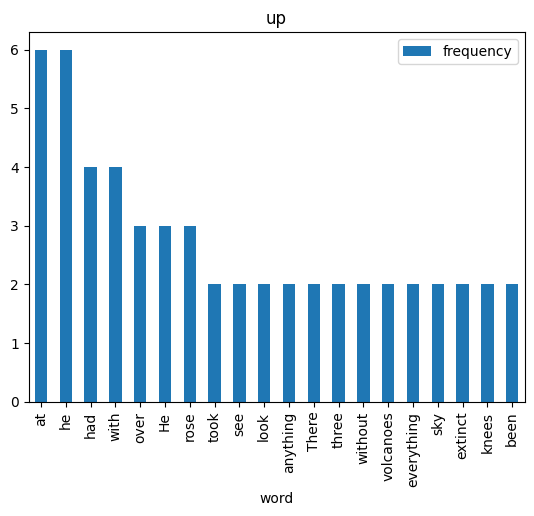

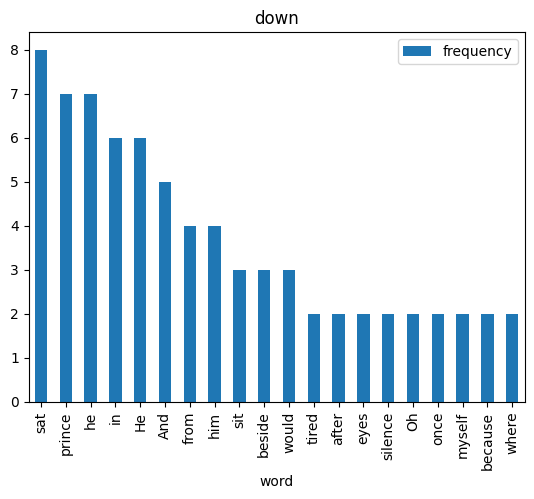

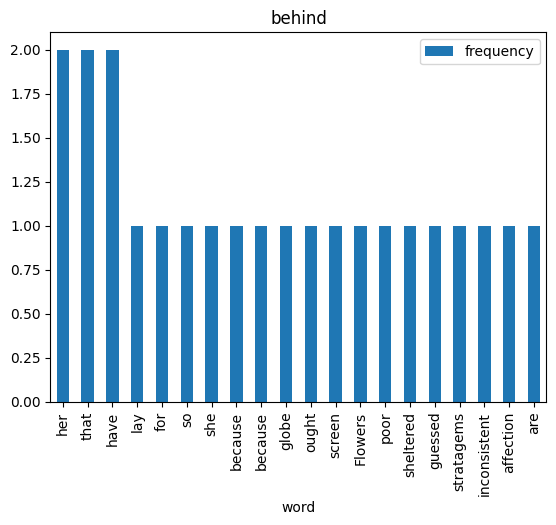

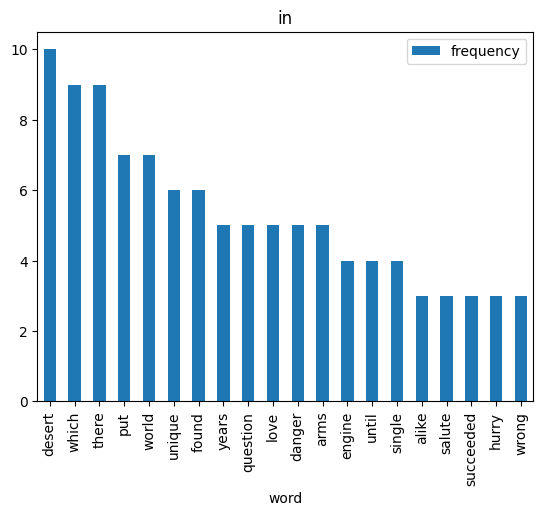

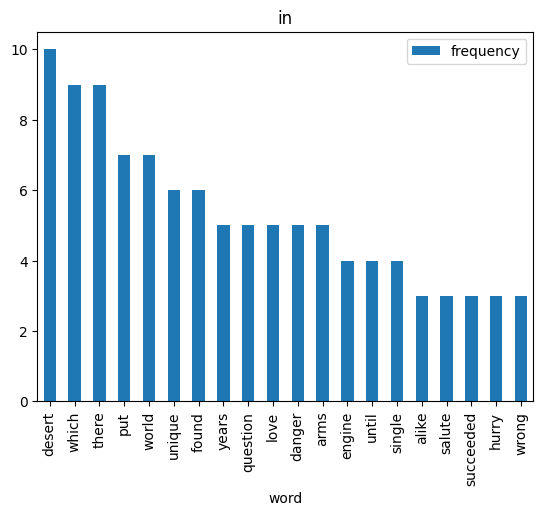

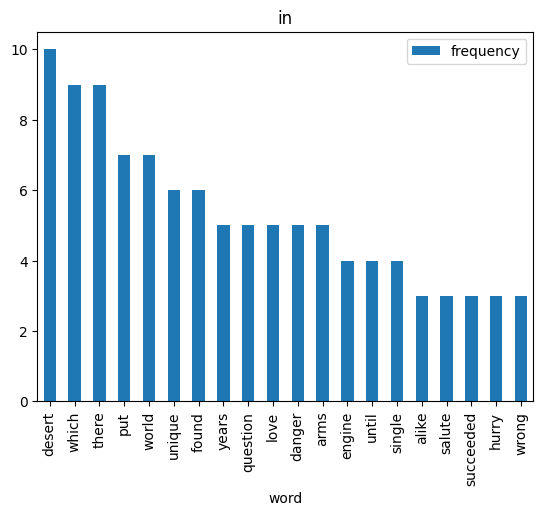

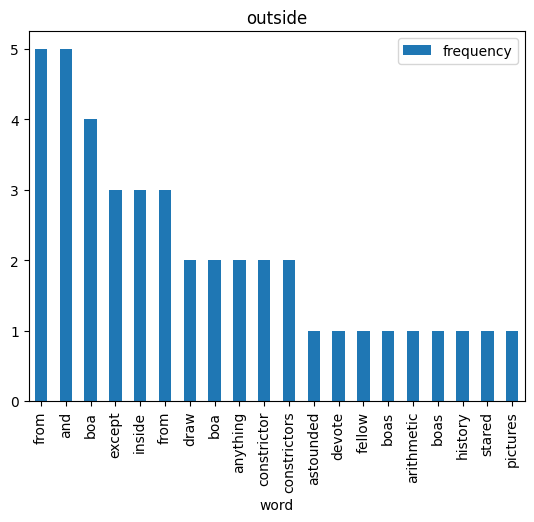

In [13]:
#%matplotlib
#plt.ioff()
for ind, dir_word in enumerate(words_of_interest):
    # Get the top collocations for each keyword in the list above
    results, results_score, freq_list = get_keyword_collocations(tokens=tokens, keyword=dir_word, numresults=number)
    # map lists into dict 
    df_dict = {'word': results, 'frequency': freq_list, 'score': results_score} 
        
    df = pd.DataFrame(df_dict)
    df.sort_values(by=['frequency'],inplace=True,ascending=False)
    df.reset_index()
    df.index += 1
    display(HTML(df.to_html()))

    # plotting a bar graph
    if len(results) != 0 :
      df.plot(x="word", y="frequency", kind="bar",title=dir_word)